In [2]:
import os

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib
from PIL import Image
from matplotlib import pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import nn
import random
import torchsummary
import pandas as pd

ModuleNotFoundError: No module named 'torchsummary'

In [38]:
import csv
Train=[]
Test=[]
f=open('/home/sumins/workspace/train_loss_history.csv','r')
rdr=csv.reader(f)
for line in rdr:
    Train.extend(line)
f.close()

f=open('/home/sumins/workspace/valid_loss_history.csv','r')
rdr=csv.reader(f)
for line in rdr:
    Test.extend(line)
f.close()



In [39]:
Train=list(map(float,Train))
Test=list(map(float,Test))

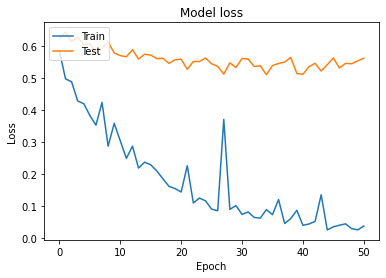

In [40]:
plt.plot(Train[:51])
plt.plot(Test[:51])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
def random_List(size):
    result=[]
    
    for i in range(size):
        result.append(random.randint(0,100))
    return result
def random_List2(size):
    result=[]
    
    for i in range(size):
        result.append(random.randint(0,1))
    return result
data=random_List(10)
label=random_List2(10)
print('Data: ',data)
print('Label: ',label)

Data:  [3, 57, 5, 22, 17, 72, 9, 91, 56, 32]
Label:  [0, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [7]:
#파일이름 sort해서 list저장
data_path='/disk1/data_liverbound_noclip/'
name_list=os.listdir(data_path)



volume_data=[files[:-4] for files in name_list if files.startswith('volume')]
volume_data=list(set(volume_data))
volume_data.sort()
vol_data_test=[]
for i in range(30,45):
    vol_data_test.append(volume_data.pop(i))


In [45]:
#이미지 불러오기
data_path='/disk1/data_liverbound_noclip/'
name_list=os.listdir(data_path)
segmentation_data = [files[:-4] for files in name_list if files.startswith('segmentation')]
segmentation_data=list(set(segmentation_data))
segmentation_data.sort()
volume_data=[files[:-4] for files in name_list if files.startswith('volume')]
volume_data=list(set(volume_data))
volume_data.sort()
print(segmentation_data)
#print(volume_data)

save_png_path='/home/sumins/workspace/example/save_png/'
save_volume_path='/home/sumins/workspace/example/save_png/vol_png/'

['segmentation-0', 'segmentation-1', 'segmentation-10', 'segmentation-100', 'segmentation-101', 'segmentation-102', 'segmentation-103', 'segmentation-104', 'segmentation-105', 'segmentation-106', 'segmentation-107', 'segmentation-108', 'segmentation-109', 'segmentation-11', 'segmentation-110', 'segmentation-111', 'segmentation-112', 'segmentation-113', 'segmentation-114', 'segmentation-115', 'segmentation-116', 'segmentation-117', 'segmentation-118', 'segmentation-119', 'segmentation-12', 'segmentation-120', 'segmentation-121', 'segmentation-122', 'segmentation-123', 'segmentation-124', 'segmentation-125', 'segmentation-126', 'segmentation-127', 'segmentation-128', 'segmentation-129', 'segmentation-13', 'segmentation-14', 'segmentation-15', 'segmentation-16', 'segmentation-17', 'segmentation-18', 'segmentation-19', 'segmentation-2', 'segmentation-20', 'segmentation-21', 'segmentation-22', 'segmentation-23', 'segmentation-24', 'segmentation-25', 'segmentation-26', 'segmentation-27', 'se

In [96]:


checkpoint = torch.load('/home/sumins/workspace/model_check/model_layer5.pth')

epoch = checkpoint['epoch']
loss = checkpoint['loss']
print(epoch)
print(loss)

91
tensor(0.1328, device='cuda:0', requires_grad=True)


In [46]:
segmentation_list=[]
for file in segmentation_data:
    fname=os.path.basename(file)
    print(fname)
    img_array=np.load(data_path+fname+'.npy')
    
    #print(f'img_num: {img_array.shape}')
    
    if len(img_array.shape) == 3:
        nx, ny, nz = img_array.shape
        total_slices = img_array.shape[2]
        print(total_slices)
        # iterate through slices
        for current_slice in range(0, total_slices):
            segmentation_list.append(img_array[:,:,current_slice]) 

segmentation-0
29
segmentation-1
32
segmentation-10
216
segmentation-100
322
segmentation-101
308
segmentation-102
374
segmentation-103
255
segmentation-104
231
segmentation-105
284
segmentation-106
199
segmentation-107
295
segmentation-108
244
segmentation-109
231
segmentation-11
198
segmentation-110
224
segmentation-111
278
segmentation-112
228
segmentation-113
201
segmentation-114
256
segmentation-115
221
segmentation-116
260
segmentation-117
309
segmentation-118
145
segmentation-119
157
segmentation-12
205
segmentation-120
141
segmentation-121
134
segmentation-122
139
segmentation-123
136
segmentation-124
133
segmentation-125
133
segmentation-126
134
segmentation-127
270
segmentation-128
349
segmentation-129
325
segmentation-13
169
segmentation-14
164
segmentation-15
158
segmentation-16
222
segmentation-17
235
segmentation-18
224
segmentation-19
223
segmentation-2
164
segmentation-20
231
segmentation-21
191
segmentation-22
53
segmentation-23
137
segmentation-24
139
segmentation-25


KeyboardInterrupt: 

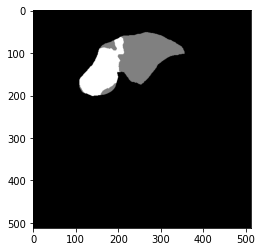

In [93]:
    plt.imshow(segmentation_list[381],cmap='gray')

In [6]:
#npy를 slice별로 나누어 하나의 list저장

for file in segmentation_data:
    fname=os.path.basename(file)
    print(fname)
    img_array=np.load(data_path+fname+'.npy')
    
    #print(f'img_num: {img_array.shape}')
    
    if len(img_array.shape) == 3:
        nx, ny, nz = img_array.shape
        total_slices = img_array.shape[2]
        print(total_slices)


segmentation-0
29
segmentation-1
32
segmentation-10
216
segmentation-100
322
segmentation-101
308
segmentation-102
374
segmentation-103
255
segmentation-104
231
segmentation-105
284
segmentation-106
199
segmentation-107
295
segmentation-108
244
segmentation-109
231
segmentation-11
198
segmentation-110
224
segmentation-111
278
segmentation-112
228
segmentation-113
201
segmentation-114
256
segmentation-115
221
segmentation-116
260
segmentation-117
309
segmentation-118
145
segmentation-119
157
segmentation-12
205
segmentation-120
141
segmentation-121
134
segmentation-122
139
segmentation-123
136
segmentation-124
133
segmentation-125
133
segmentation-126
134
segmentation-127
270
segmentation-128
349
segmentation-129
325
segmentation-13
169
segmentation-14
164
segmentation-15
158
segmentation-16
222
segmentation-17
235
segmentation-18
224
segmentation-19
223
segmentation-2
164
segmentation-20
231
segmentation-21
191
segmentation-22
53
segmentation-23
137
segmentation-24
139
segmentation-25


In [24]:
vol_train, vol_valid, lab_train, lab_valid = train_test_split(data, label, test_size=0.2, shuffle=True, stratify=label, random_state=34)

In [32]:
print(vol_train)
print(lab_train)
print(vol_valid)
print(lab_valid)

[72, 32, 5, 3, 91, 56, 9, 22]
[1, 0, 1, 0, 1, 1, 1, 0]
[57, 17]
[0, 1]


In [26]:
class CustomDataset(Dataset): 

  def __init__(self,volume_list,all_labels,transforms=None):
    self.volume_list=volume_list
    self.all_labels=all_labels
    self.length=len(all_labels)
    self.transforms=transforms


  def __len__(self):
    return self.length


  def __getitem__(self, idx):
    npy=self.volume_list[idx]
    
    return{'npy':npy,'label':self.all_labels[idx]}

In [27]:
train_dataset=CustomDataset(volume_list=vol_train, all_labels=lab_train)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [28]:
for i_batch, item in enumerate(train_loader):
    npys = item['npy']
    labels = item['label']
    print(npys,"//",labels)


tensor([86]) // tensor([1])
tensor([3]) // tensor([0])
tensor([75]) // tensor([0])
tensor([29]) // tensor([0])
tensor([98]) // tensor([0])
tensor([99]) // tensor([1])
tensor([77]) // tensor([0])
tensor([55]) // tensor([0])


In [7]:
from torch import nn

class CustomConvNet(nn.Module):
    def __init__(self):
        super(CustomConvNet, self).__init__() #상속받은 class에 접근하기 위함

        self.layer1 = self.conv_module(1, 16) #흑백사진은 inp
        self.layer2 = self.conv_module(16, 32)
        self.layer3 = self.conv_module(32, 64)
        self.layer4 = self.conv_module(64, 128)
        self.layer5 = self.conv_module(128, 256)
        self.layer6=self.conv_module(256,512)
        self.gap = self.global_avg_pool(512, 2)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out=self.layer6(out)
        out = self.gap(out)
        out = out.view(-1, 2)

        return out

    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1)))

In [8]:
model=CustomConvNet()
if torch.cuda.is_available():
    model.cuda()
    
torchsummary.summary(model,input_size=(1,512,512),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 512, 512]             160
       BatchNorm2d-2          [1, 16, 512, 512]              32
         LeakyReLU-3          [1, 16, 512, 512]               0
         MaxPool2d-4          [1, 16, 256, 256]               0
            Conv2d-5          [1, 32, 256, 256]           4,640
       BatchNorm2d-6          [1, 32, 256, 256]              64
         LeakyReLU-7          [1, 32, 256, 256]               0
         MaxPool2d-8          [1, 32, 128, 128]               0
            Conv2d-9          [1, 64, 128, 128]          18,496
      BatchNorm2d-10          [1, 64, 128, 128]             128
        LeakyReLU-11          [1, 64, 128, 128]               0
        MaxPool2d-12            [1, 64, 64, 64]               0
           Conv2d-13           [1, 128, 64, 64]          73,856
      BatchNorm2d-14           [1, 128,

In [29]:
from torch import nn
class CNN(nn.Module):
    def __init__(self):
    	# super함수는 CNN class의 부모 class인 nn.Module을 초기화
        super(CNN, self).__init__()
        
        # batch_size = 1
        self.layer = nn.Sequential(
            # [1,1,512,512] -> [1,16,508,508]
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),
            nn.ReLU(),
            
            # [1,16,508,508] -> [1,32,504,504]
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),
            nn.ReLU(),
            
            # [1,32,504,504] -> [1,32,10,252,252]
            nn.MaxPool2d(kernel_size=2,stride=2),
            
            # [1,32,252,252] -> [1,64,248,248]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
            nn.ReLU(),
            
            # [1,64,248,248] -> [1,64,124,124]
            nn.MaxPool2d(kernel_size=2,stride=2), 

            # [1,64,124,124] -> [1,128,120,120]
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5),
            nn.ReLU(),
            # [1,128,120,120] -> [1,128,60,60]
            nn.MaxPool2d(kernel_size=2,stride=2),    
            # [1,128,60,60] -> [1,256,56,56]
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5),
            nn.ReLU(),
            # [1,256,56,56] -> [1,256,28,28]
            nn.MaxPool2d(kernel_size=2,stride=2)         
        )
        self.fc_layer = nn.Sequential(
        	# [100,64*3*3] -> [100,100]
            nn.Linear(401408,100),                                              
            nn.ReLU(),
            # [100,100] -> [100,10]
            nn.Linear(100,2)                                                   
        )       
        
    def forward(self,x):
    	# self.layer에 정의한 연산 수행
        out = self.layer(x)
        # view 함수를 이용해 텐서의 형태를 [100,나머지]로 변환
        out = out.view(1,-1)
        # self.fc_layer 정의한 연산 수행    
        out = self.fc_layer(out)
        return out

In [30]:
model2=CNN()
if torch.cuda.is_available():
    model2.cuda()
    
torchsummary.summary(model2,input_size=(1,512,512),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 508, 508]             416
              ReLU-2          [1, 16, 508, 508]               0
            Conv2d-3          [1, 32, 504, 504]          12,832
              ReLU-4          [1, 32, 504, 504]               0
         MaxPool2d-5          [1, 32, 252, 252]               0
            Conv2d-6          [1, 64, 248, 248]          51,264
              ReLU-7          [1, 64, 248, 248]               0
         MaxPool2d-8          [1, 64, 124, 124]               0
            Conv2d-9         [1, 128, 120, 120]         204,928
             ReLU-10         [1, 128, 120, 120]               0
        MaxPool2d-11           [1, 128, 60, 60]               0
           Conv2d-12           [1, 256, 56, 56]         819,456
             ReLU-13           [1, 256, 56, 56]               0
        MaxPool2d-14           [1, 256,

In [33]:
#이미지 불러오기
data_path='/disk1/data_liverbound_noclip/'
name_list=os.listdir(data_path)
segmentation_data = [files[:-4] for files in name_list if files.startswith('segmentation')]
segmentation_data=list(set(segmentation_data))
segmentation_data.sort()
volume_data=[files[:-4] for files in name_list if files.startswith('volume')]
volume_data=list(set(volume_data))
volume_data.sort()
print(segmentation_data)
#print(volume_data)

save_png_path='/home/sumins/workspace/example/save_png/'
save_volume_path='/home/sumins/workspace/example/save_png/vol_png/'

['segmentation-0', 'segmentation-1', 'segmentation-10', 'segmentation-100', 'segmentation-101', 'segmentation-102', 'segmentation-103', 'segmentation-104', 'segmentation-105', 'segmentation-106', 'segmentation-107', 'segmentation-108', 'segmentation-109', 'segmentation-11', 'segmentation-110', 'segmentation-111', 'segmentation-112', 'segmentation-113', 'segmentation-114', 'segmentation-115', 'segmentation-116', 'segmentation-117', 'segmentation-118', 'segmentation-119', 'segmentation-12', 'segmentation-120', 'segmentation-121', 'segmentation-122', 'segmentation-123', 'segmentation-124', 'segmentation-125', 'segmentation-126', 'segmentation-127', 'segmentation-128', 'segmentation-129', 'segmentation-13', 'segmentation-14', 'segmentation-15', 'segmentation-16', 'segmentation-17', 'segmentation-18', 'segmentation-19', 'segmentation-2', 'segmentation-20', 'segmentation-21', 'segmentation-22', 'segmentation-23', 'segmentation-24', 'segmentation-25', 'segmentation-26', 'segmentation-27', 'se

In [34]:
segmentation_list=[]
for file in segmentation_data:
    fname=os.path.basename(file)
    print(fname)
    img_array=np.load(data_path+fname+'.npy')
    
    #print(f'img_num: {img_array.shape}')
    
    if len(img_array.shape) == 3:
        nx, ny, nz = img_array.shape
        total_slices = img_array.shape[2]
        print(total_slices)
        # iterate through slices
        for current_slice in range(0, total_slices):
            segmentation_list.append(img_array[:,:,current_slice]) 
#간 1, 병변 2, 나머지 0


segmentation-0
29
segmentation-1
32
segmentation-10
216
segmentation-100
322
segmentation-101
308
segmentation-102
374
segmentation-103
255
segmentation-104
231
segmentation-105
284
segmentation-106
199
segmentation-107
295
segmentation-108
244
segmentation-109
231
segmentation-11
198
segmentation-110
224
segmentation-111
278
segmentation-112
228
segmentation-113
201
segmentation-114
256
segmentation-115
221
segmentation-116
260
segmentation-117
309
segmentation-118
145
segmentation-119
157
segmentation-12
205
segmentation-120
141
segmentation-121
134
segmentation-122
139
segmentation-123
136
segmentation-124
133
segmentation-125
133
segmentation-126
134
segmentation-127
270
segmentation-128
349
segmentation-129
325
segmentation-13
169
segmentation-14
164
segmentation-15
158
segmentation-16
222
segmentation-17
235
segmentation-18
224
segmentation-19
223
segmentation-2
164
segmentation-20
231
segmentation-21
191
segmentation-22
53
segmentation-23
137
segmentation-24
139
segmentation-25


In [35]:
all_labels = []
for i in segmentation_list:
    if 2 in i:
        all_labels.append(1)
    else:
        all_labels.append(0)

In [38]:
num=0
for i in all_labels:
    if i==1:
        num+=1
print(num)

6990


In [52]:
for i in range(30):
    print(i+1,"//",all_labels[i])

1 // 0
2 // 0
3 // 0
4 // 1
5 // 0
6 // 0
7 // 0
8 // 0
9 // 0
10 // 0
11 // 0
12 // 0
13 // 0
14 // 1
15 // 1
16 // 1
17 // 1
18 // 1
19 // 1
20 // 1
21 // 0
22 // 0
23 // 1
24 // 1
25 // 1
26 // 1
27 // 1
28 // 1
29 // 1
30 // 0


In [49]:

num=0
for i in segmentation_list:
    zero=0
    one=0
    two=0
    for j in i:
        for k in j:
            if k==0:
                zero+=1
            elif k==1:
                one+=1
            elif k==2:
                two+=1
    num+=1
    print("nume={}//0={},1={},2={}".format(num, zero,one,two))

nume=1//0=262144,1=0,2=0
nume=2//0=262144,1=0,2=0
nume=3//0=261034,1=1110,2=0
nume=4//0=259851,1=2247,2=46
nume=5//0=259087,1=3057,2=0
nume=6//0=257884,1=4260,2=0
nume=7//0=253972,1=8172,2=0
nume=8//0=252049,1=10095,2=0
nume=9//0=250682,1=11462,2=0
nume=10//0=248718,1=13426,2=0
nume=11//0=247538,1=14606,2=0
nume=12//0=246084,1=16060,2=0
nume=13//0=244111,1=18033,2=0
nume=14//0=241159,1=20812,2=173
nume=15//0=237797,1=23979,2=368
nume=16//0=234972,1=26634,2=538
nume=17//0=232743,1=29024,2=377
nume=18//0=231454,1=30501,2=189
nume=19//0=230558,1=31493,2=93
nume=20//0=229407,1=32725,2=12
nume=21//0=228760,1=33384,2=0
nume=22//0=228290,1=33854,2=0
nume=23//0=227818,1=34317,2=9
nume=24//0=229236,1=32758,2=150
nume=25//0=230909,1=31162,2=73
nume=26//0=233420,1=28691,2=33
nume=27//0=239522,1=22486,2=136
nume=28//0=243918,1=18193,2=33
nume=29//0=249699,1=12272,2=173
nume=30//0=262144,1=0,2=0
nume=31//0=262144,1=0,2=0
nume=32//0=262136,1=8,2=0
nume=33//0=260997,1=1147,2=0


KeyboardInterrupt: 